In [33]:
function qubit(D,n,A)
    x=[1;0]
    y=[0;1]
    if A == 3
        P=x*x'
    elseif A == 1
        k=(1/sqrt(2))*(x+y)
        P=k*k'
    elseif A==2 
        k=(1/sqrt(2))*(x+1im*y)
        P=k*k'
    end
    h=P*D
    q=0
    for i in 1:2
        q=q+h[i,i]
    end
    list=zeros(n)
    for i in 1:n
    l=rand()
    if l<=abs(q)
        list[i]=1
    else
            list[i]=-1
    end
    end
    return list
end;

In [34]:
D=[1/2 1/2; 1/2 1/2];

In [35]:
using PyPlot;

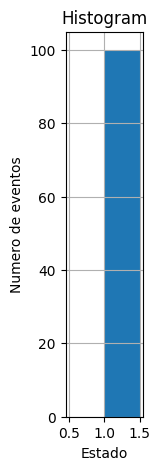

In [6]:
s=qubit(D,100,1)
nbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](s,nbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

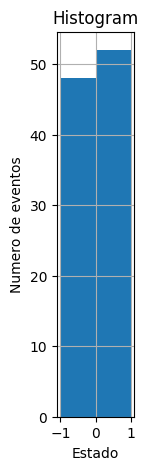

In [7]:
t=qubit(D,100,2)
sbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](t,sbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

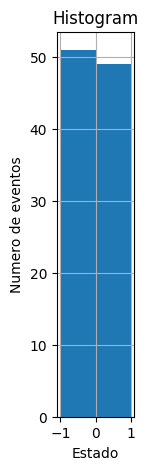

In [8]:
t=qubit(D,100,3)
sbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](t,sbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

In [36]:
H=[1/2 0; 0 1/2];

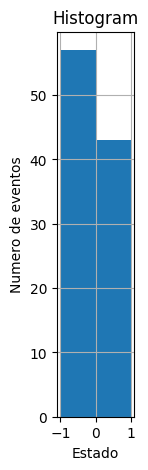

In [10]:
t=qubit(H,100,1)
sbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](t,sbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

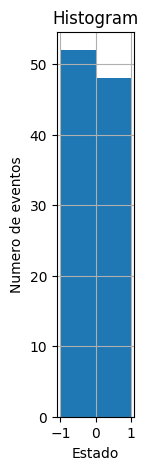

In [11]:
t=qubit(H,100,2)
sbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](t,sbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

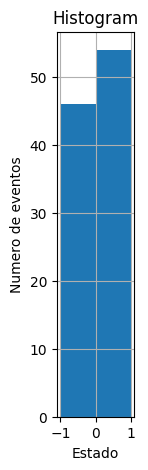

In [12]:
t=qubit(H,100,3)
sbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](t,sbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

In [37]:
function Promedio(x)
    n=length(x)
    r=0
    for i in 1:n
        r=r+x[i]
    end
    r=r/n
    return r
end;

In [38]:
function Reconstruccion(D,n)
    listx=qubit(D,n,1)
    listy=qubit(D,n,2)
    listz=qubit(D,n,3)
    x=Promedio(listx)
    y=Promedio(listy)
    z=Promedio(listz)
    A=(1/2)*([1 0;0 1]+x*[0 1;1 0]+y*[0 -1im;1im 0]+z*[1 0;-1 0])
    return A
    end;

In [56]:
function Raiz(A)
    a=A[1,1]
    b=A[1,2]
    c=A[2,1]
    d=A[2,2]
    v=a*d-b*c
    m=a+d
    R=(A+v*[1 0;0 1])*(1/m)
    return R
end;    

In [106]:
function Fidelidad(D,n)
    B=Raiz(D)
    A=Reconstruccion(D,n)
    C=B*A*B
    H=Raiz(C)
    f=0
    for i in 1:2
        f=f+H[i,i]
    end
    return abs(f)
end;        

In [94]:
D=[1/2 1/2; 1/2 1/2]
H=[1/2 0; 0 1/2];

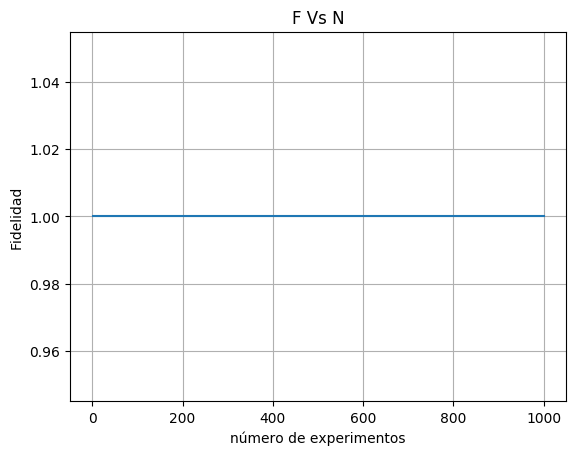

In [137]:
n=linspace(1,1000,1000)
y=zeros(1000)
for i in 1:1000
    y[i]=Fidelidad(D,i)
end
xlabel("número de experimentos")
ylabel("Fidelidad")
title("F Vs N")
grid("on")
plot(n,y);

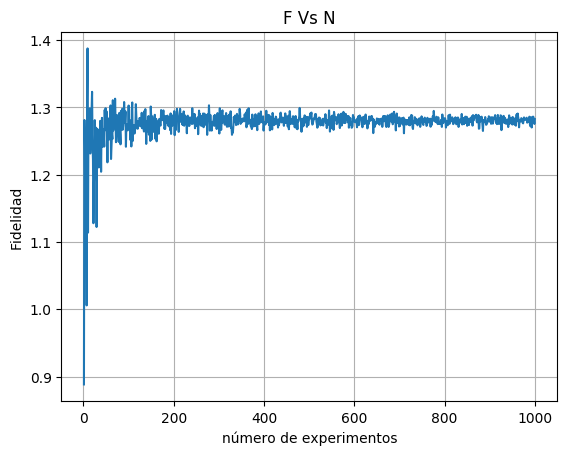

In [138]:
n=linspace(1,1000,1000)
y=zeros(1000)
for i in 1:1000
    y[i]=Fidelidad(H,i)
end
xlabel("número de experimentos")
ylabel("Fidelidad")
title("F Vs N")
grid("on")
plot(n,y);